<a href="https://colab.research.google.com/github/Naiker911/Mathematics-for-Data-Science/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%22%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0_%D0%B4%D0%BB%D1%8F_Data_Science%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
from scipy.misc import derivative
%matplotlib inline

Вычислите производную функции:

tg^2*(sin(x)+ cos(2*x+3))

в точке X0=1

In [ ]:
def function(x):
  return (np.tan(np.sin(x) + np.cos(2*x + 3)))**2

derivative(function, 1.0, dx=1e-6)

<ipython-input-71-2edc28dc0a2d>:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  derivative(function, 1.0, dx=1e-6)


55.3859176464222

Задание 2

Дан объект в 2D пространстве

(-200.0, 200.0)

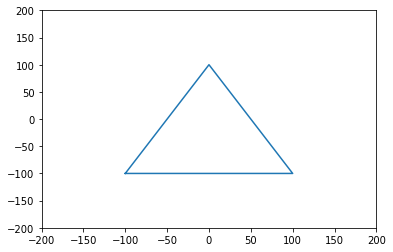

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:

Смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)

(-200.0, 400.0)

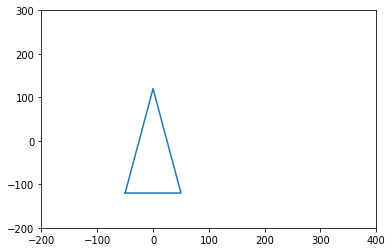

In [ ]:
B = []
TransformArray = np.array([[1, 0, 200],[0, 1, 300], [0, 0, 1]])
for point in A:
  new_point = np.dot(TransformArray,np.transpose(point))
  B.append(new_point)
B = np.array(B)
TransformArray = np.array([[0.5, 0, 0], [0, 1.2, 0], [0, 0, 1]])
C = []
for point in A:
  new_point = np.dot(TransformArray,np.transpose(point))
  C.append(new_point)
C = np.array(C)
x = C[:,0]
y = C[:,1]
plt.plot(x, y)
plt.ylim([-200, 300])
plt.xlim([-200, 400])

Задание 3

Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [ 0.89442719 -0.89442719]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [0.4472136 0.4472136]


Задание 4

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

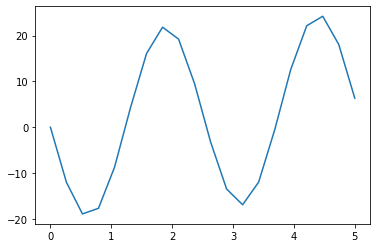

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
params = [2, -2]

res = minimize(error, params, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})

res.x

Optimization terminated successfully.
         Current function value: 0.000106
         Iterations: 57
         Function evaluations: 108


<ipython-input-66-06187b6503d8>:3: OptimizeWarning: Unknown solver options: xtol
  res = minimize(error, params, method='nelder-mead', options={'xtol': 1e-6, 'disp': True})


array([ 3.00000022, -2.50000014])

Задание 5

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
for i in range(0, 10):
    sim = 0
    for j in range(0, 10):
        if i != j:
            x1 = raitings[i]
            x2 = raitings[j]

            coss = np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

            if coss > sim:
                sim = coss
                user = j + 1

#     print(f'На {i+1} пользователя больше всего похож пользователь {user}')
    print(f'({i+1}, {user})')

(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)
